<a href="https://colab.research.google.com/github/JBlake26/ECGR4105_IntroToML/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Homework 3**

In this homework, we will use the cancer dataset. (Note: You can use the built-in function from ML libraries for gradient descent, training, and validation.) Also, sample code for accessing and cleaning up the dataset provided in Canvas. For the evaluation of this homework across all problems, use 80%, 20% split.

In [1]:
#drive.mount('/content/drive/')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression 
from sklearn import datasets
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA

Problem 1

Use the cancer dataset to build a Naïve Bayesian model to classify the type of cancer (Malignant vs. benign). Plot your classification accuracy, precision, and recall. Explain and elaborate on your results. Can you compare your results against the logistic regression classifier you did in previous homework.

In [2]:
class_model = GaussianNB()
data_set = datasets.load_breast_cancer()

class_model.fit(data_set.data,data_set.target)

GaussianNB()

In [3]:
predicted = class_model.predict(data_set.data)
expected = data_set.target

print(metrics.classification_report(expected,predicted))
print(metrics.confusion_matrix(expected,predicted))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       212
           1       0.94      0.97      0.95       357

    accuracy                           0.94       569
   macro avg       0.94      0.93      0.94       569
weighted avg       0.94      0.94      0.94       569

[[189  23]
 [ 10 347]]


In [4]:
print("Accuracy:",metrics.accuracy_score(expected,predicted))
print("Precision:",metrics.precision_score(expected,predicted))
print("Recall:",metrics.recall_score(expected,predicted))

Accuracy: 0.9420035149384886
Precision: 0.9378378378378378
Recall: 0.9719887955182073


Problem 2

Use the cancer dataset to build a logistic regression model to classify the type of cancer (Malignant vs. benign). Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K). Identify the optimum number of K, principal components that achieve the highest classification accuracy. Plot your classification accuracy, precision, and recall over a different number of Ks. Explain and elaborate on your results.

In [5]:
data_set = load_breast_cancer()
input_data = pd.DataFrame(data_set.data)
input_data.head

<bound method NDFrame.head of         0      1       2       3        4        5        6        7       8   \
0    17.99  10.38  122.80  1001.0  0.11840  0.27760  0.30010  0.14710  0.2419   
1    20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690  0.07017  0.1812   
2    19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740  0.12790  0.2069   
3    11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140  0.10520  0.2597   
4    20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800  0.10430  0.1809   
..     ...    ...     ...     ...      ...      ...      ...      ...     ...   
564  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390  0.13890  0.1726   
565  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400  0.09791  0.1752   
566  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251  0.05302  0.1590   
567  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140  0.15200  0.2397   
568   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000  0.00000  0.1587  

In [6]:
# data labeling

labels = data_set.target
labels.shape

(569,)

In [7]:
# reshape data

labels = np.reshape(labels,(569,1))

# add labels

final_cancer_data = np.concatenate([input_data,labels],axis=1)

In [8]:
# data set table

cancer_dataset = pd.DataFrame(final_cancer_data)
features = data_set.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [9]:
features_label = np.append(features,'test')
cancer_dataset.columns = features_label
cancer_dataset.head

<bound method NDFrame.head of      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean conca

In [10]:
X = cancer_dataset.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]]
Y = cancer_dataset.iloc[:,30].values

import random
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size = 0.2, random_state = 5)

# standardize for overfitting

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [11]:
Y_pred = classifier.predict(X_test)
Y_pred[0:9]

array([0., 1., 1., 1., 1., 0., 1., 1., 1.])

In [12]:
# evaluation matrix

cnfMatrix = confusion_matrix(Y_test, Y_pred)
cnfMatrix

array([[47,  1],
       [ 0, 66]])

In [13]:
# evaluate

accuracy = metrics.accuracy_score(Y_test, Y_pred)
precision = metrics.precision_score(Y_test, Y_pred)
recall = metrics.recall_score(Y_test, Y_pred)
average = (accuracy+precision+recall)/3

print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("Average:",average)

Accuracy: 0.9912280701754386
Precision: 0.9850746268656716
Recall: 1.0
Average: 0.9921008990137034


In [14]:
# PCA Function

x = cancer_dataset.loc[:,features].values
y = cancer_dataset.loc[:,['test']].values

x = StandardScaler().fit_transform(x)

accuracyGraph = []
precisionGraph = []
recallGraph = []

In [15]:
# K loop for K values 30 inputs

for k in range(1,31):
  pca = PCA(n_components=k)
  Components = pca.fit_transform(x)
  df = pd.DataFrame(data = Components, columns = [*range(1,k+1)])
  final_df = pd.concat([df, cancer_dataset[['test']]], axis=1)
  outcome = final_df.pop("test")

  x2 = final_df.values
  y2 = outcome.values
  X_train, X_test, Y_train, Y_test = train_test_split(x2, y2, train_size=0.8, test_size = 0.2, random_state = 5)
  classifier.fit(X_train, Y_train)

  #prediction
  Y_pred = classifier.predict(X_test)

  cnfMatrix = confusion_matrix(Y_test, Y_pred)

  accuracy = metrics.accuracy_score(Y_test, Y_pred)
  accuracyGraph.append(accuracy)
  precision = metrics.precision_score(Y_test, Y_pred)
  precisionGraph.append(precision)
  recall = metrics.recall_score(Y_test, Y_pred)
  recallGraph.append(recall)
  newAverage = (accuracy+precision+recall)/3
  if average<newAverage:
    average = newAverage
    index=k

In [16]:
# PCA

pca = PCA(n_components=k)
components = pca.fit_transform(x)
df = pd.DataFrame(data = components, columns = [*range(1,k+1)])
final_df =pd.concat([df, cancer_dataset[['test']]], axis=1)

x2 = final_df.values
y2 = outcome.values
X_train, X_test, Y_train, Y_test = train_test_split(x2, y2, train_size=0.8, test_size = 0.2, random_state = 5)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [17]:
# prediction
Y_pred = classifier.predict(X_test)

cnfMatrix = confusion_matrix(Y_test, Y_pred)

print("Accuracy:",metrics.accuracy_score(Y_test,Y_pred))
print("Precision:",metrics.precision_score(Y_test,Y_pred))
print("Recall:",metrics.recall_score(Y_test,Y_pred))
print("Final k: ", k)

Accuracy: 0.9824561403508771
Precision: 0.9705882352941176
Recall: 1.0
Final k:  30


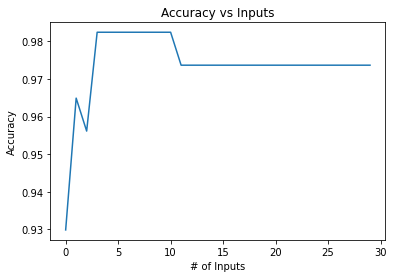

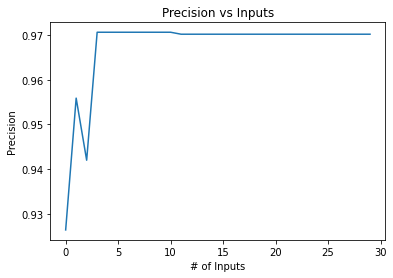

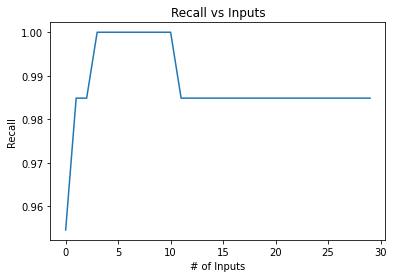

In [18]:
# Graph Evaluations

plt.plot(accuracyGraph)
plt.xlabel('# of Inputs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Inputs')
plt.show()

plt.plot(precisionGraph)
plt.xlabel('# of Inputs')
plt.ylabel('Precision')
plt.title('Precision vs Inputs')
plt.show()

plt.plot(recallGraph)
plt.xlabel('# of Inputs')
plt.ylabel('Recall')
plt.title('Recall vs Inputs')
plt.show()

Problem 3

Can you repeat problem 2? This time, replace logistic regression with the Bayes classifier. Report your results (classification accuracy, precision, and recall). Compare your results against problem 2.

In [19]:
data_set = load_breast_cancer()
input_data = pd.DataFrame(data_set.data)
input_data.head

<bound method NDFrame.head of         0      1       2       3        4        5        6        7       8   \
0    17.99  10.38  122.80  1001.0  0.11840  0.27760  0.30010  0.14710  0.2419   
1    20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690  0.07017  0.1812   
2    19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740  0.12790  0.2069   
3    11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140  0.10520  0.2597   
4    20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800  0.10430  0.1809   
..     ...    ...     ...     ...      ...      ...      ...      ...     ...   
564  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390  0.13890  0.1726   
565  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400  0.09791  0.1752   
566  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251  0.05302  0.1590   
567  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140  0.15200  0.2397   
568   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000  0.00000  0.1587  

In [20]:
# data labeling

labels = data_set.target
labels.shape

(569,)

In [21]:
# reshape data

labels = np.reshape(labels,(569,1))

# add labels

final_cancer_data = np.concatenate([input_data,labels],axis=1)

In [22]:
# data set table

cancer_dataset = pd.DataFrame(final_cancer_data)
features = data_set.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [23]:
features_label = np.append(features,'test')
cancer_dataset.columns = features_label
cancer_dataset.head

<bound method NDFrame.head of      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean conca

In [24]:
X = cancer_dataset.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]]
Y = cancer_dataset.iloc[:,30].values

import random
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size = 0.2, random_state = 5)

# standardize for overfitting

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB()

In [25]:
Y_pred = classifier.predict(X_test)
Y_pred[0:9]

array([0., 1., 1., 1., 1., 0., 1., 1., 1.])

In [26]:
# evaluation matrix

cnfMatrix = confusion_matrix(Y_test, Y_pred)
cnfMatrix

array([[48,  0],
       [ 0, 66]])

In [27]:
# evaluate

accuracy = metrics.accuracy_score(Y_test, Y_pred)
precision = metrics.precision_score(Y_test, Y_pred)
recall = metrics.recall_score(Y_test, Y_pred)
average = (accuracy+precision+recall)/3

print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("Average:",average)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Average: 1.0


In [28]:
# PCA Function

x = cancer_dataset.loc[:,features].values
y = cancer_dataset.loc[:,['test']].values

x = StandardScaler().fit_transform(x)

accuracyGraph = []
precisionGraph = []
recallGraph = []

In [29]:
# K loop for K values 30 inputs

for k in range(1,31):
  pca = PCA(n_components=k)
  Components = pca.fit_transform(x)
  df = pd.DataFrame(data = Components, columns = [*range(1,k+1)])
  final_df = pd.concat([df, cancer_dataset[['test']]], axis=1)
  outcome = final_df.pop("test")

  x2 = final_df.values
  y2 = outcome.values
  X_train, X_test, Y_train, Y_test = train_test_split(x2, y2, train_size=0.8, test_size = 0.2, random_state = 5)
  classifier.fit(X_train, Y_train)

  #prediction
  Y_pred = classifier.predict(X_test)

  cnfMatrix = confusion_matrix(Y_test, Y_pred)

  accuracy = metrics.accuracy_score(Y_test, Y_pred)
  accuracyGraph.append(accuracy)
  precision = metrics.precision_score(Y_test, Y_pred)
  precisionGraph.append(precision)
  recall = metrics.recall_score(Y_test, Y_pred)
  recallGraph.append(recall)
  newAverage = (accuracy+precision+recall)/3
  if average<newAverage:
    average = newAverage
    index=k

In [30]:
# PCA

pca = PCA(n_components=k)
components = pca.fit_transform(x)
df = pd.DataFrame(data = components, columns = [*range(1,k+1)])
final_df =pd.concat([df, cancer_dataset[['test']]], axis=1)

x2 = final_df.values
y2 = outcome.values
X_train, X_test, Y_train, Y_test = train_test_split(x2, y2, train_size=0.8, test_size = 0.2, random_state = 5)
classifier.fit(X_train, Y_train)

GaussianNB()

In [31]:
# prediction
Y_pred = classifier.predict(X_test)

cnfMatrix = confusion_matrix(Y_test, Y_pred)

print("Accuracy:",metrics.accuracy_score(Y_test,Y_pred))
print("Precision:",metrics.precision_score(Y_test,Y_pred))
print("Recall:",metrics.recall_score(Y_test,Y_pred))
print("Final k: ", k)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Final k:  30


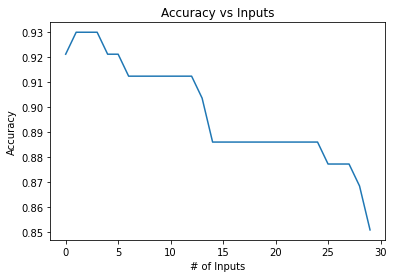

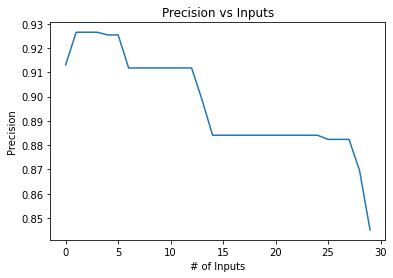

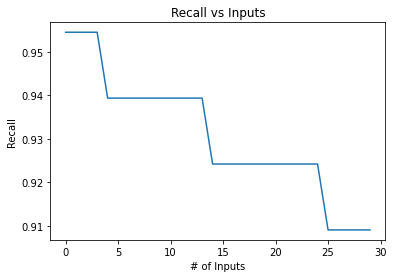

In [32]:
# Graph Evaluations

plt.plot(accuracyGraph)
plt.xlabel('# of Inputs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Inputs')
plt.show()

plt.plot(precisionGraph)
plt.xlabel('# of Inputs')
plt.ylabel('Precision')
plt.title('Precision vs Inputs')
plt.show()

plt.plot(recallGraph)
plt.xlabel('# of Inputs')
plt.ylabel('Recall')
plt.title('Recall vs Inputs')
plt.show()